In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.datasets import make_blobs
import mlflow

In [83]:
file_path='/Users/mohamedafrith/Downloads/train_data.csv'
df=pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [84]:
file_path='/Users/mohamedafrith/Downloads/test_data.csv'
df_test=pd.read_csv(file_path)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33095 entries, 0 to 33094
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  33095 non-null  int64 
 1   month                 33095 non-null  int64 
 2   day                   33095 non-null  int64 
 3   order                 33095 non-null  int64 
 4   country               33095 non-null  int64 
 5   session_id            33095 non-null  int64 
 6   page1_main_category   33095 non-null  int64 
 7   page2_clothing_model  33095 non-null  object
 8   colour                33095 non-null  int64 
 9   location              33095 non-null  int64 
 10  model_photography     33095 non-null  int64 
 11  price                 33095 non-null  int64 
 12  price_2               33095 non-null  int64 
 13  page                  33095 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 3.5+ MB


In [85]:
columns_list=list(df.columns)
columns_list.pop(7)

'page2_clothing_model'

In [86]:
columns_list=list(df_test.columns)
columns_list.pop(7)

'page2_clothing_model'

In [87]:
for i in columns_list:
    

    # Calculate Q1, Q3, and IQR for the chosen i
    Q1 = df[i].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[i].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers in the chosen i
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    mean_without_outliers = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)][i].mean()
    mean_without_outliers=round(mean_without_outliers)
    print(i,mean_without_outliers)
    print('***************************')

    print("Detected Outliers in '{}':\n".format(i), outliers)

year 2008
***************************
Detected Outliers in 'year':
 Empty DataFrame
Columns: [year, month, day, order, country, session_id, page1_main_category, page2_clothing_model, colour, location, model_photography, price, price_2, page]
Index: []
month 6
***************************
Detected Outliers in 'month':
 Empty DataFrame
Columns: [year, month, day, order, country, session_id, page1_main_category, page2_clothing_model, colour, location, model_photography, price, price_2, page]
Index: []
day 15
***************************
Detected Outliers in 'day':
 Empty DataFrame
Columns: [year, month, day, order, country, session_id, page1_main_category, page2_clothing_model, colour, location, model_photography, price, price_2, page]
Index: []
order 7
***************************
Detected Outliers in 'order':
         year  month  day  order  country  session_id  page1_main_category  \
34      2008      8    3     32       29       22439                    4   
36      2008      4   10    

In [88]:
df.loc[df["order"] >= 32 , "order"] = 7


In [89]:
#Label encoding

le = LabelEncoder()
df['page2_clothing_model']=le.fit_transform(df['page2_clothing_model'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   year                  132379 non-null  int64
 1   month                 132379 non-null  int64
 2   day                   132379 non-null  int64
 3   order                 132379 non-null  int64
 4   country               132379 non-null  int64
 5   session_id            132379 non-null  int64
 6   page1_main_category   132379 non-null  int64
 7   page2_clothing_model  132379 non-null  int64
 8   colour                132379 non-null  int64
 9   location              132379 non-null  int64
 10  model_photography     132379 non-null  int64
 11  price                 132379 non-null  int64
 12  price_2               132379 non-null  int64
 13  page                  132379 non-null  int64
dtypes: int64(14)
memory usage: 14.1 MB


In [90]:
df_test

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,4,22,4,29,5279,4,P48,9,4,2,33,2,3
1,2008,5,19,1,29,10059,1,A15,14,5,2,33,2,1
2,2008,4,11,10,29,2919,4,P23,6,2,2,28,2,2
3,2008,4,28,3,27,6304,2,B24,11,2,1,57,1,2
4,2008,5,26,1,29,11266,1,A2,3,1,1,43,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,2008,5,13,1,29,8885,1,A5,3,2,1,43,2,1
33091,2008,4,14,3,29,3546,1,A15,14,5,2,33,2,1
33092,2008,6,13,37,29,14336,2,B9,1,3,1,48,2,1
33093,2008,5,23,16,29,10786,3,C34,7,6,1,48,1,2


In [91]:
le = LabelEncoder()
df_test['page2_clothing_model']=le.fit_transform(df_test['page2_clothing_model'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33095 entries, 0 to 33094
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   year                  33095 non-null  int64
 1   month                 33095 non-null  int64
 2   day                   33095 non-null  int64
 3   order                 33095 non-null  int64
 4   country               33095 non-null  int64
 5   session_id            33095 non-null  int64
 6   page1_main_category   33095 non-null  int64
 7   page2_clothing_model  33095 non-null  int64
 8   colour                33095 non-null  int64
 9   location              33095 non-null  int64
 10  model_photography     33095 non-null  int64
 11  price                 33095 non-null  int64
 12  price_2               33095 non-null  int64
 13  page                  33095 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [92]:
y_train=pd.DataFrame(df['price'])
y_train

,price
0,48
1,57
2,48
3,43
4,57
...,...
132374,48
132375,28
132376,38
132377,20


In [93]:
x_train=df.drop(['price'],axis=1)

In [94]:
y_test=pd.DataFrame(df_test['price'])

In [95]:
x_test=df_test.drop(['price'],axis=1)

In [96]:
standard_scaler = StandardScaler()
scaled_value= standard_scaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(scaled_value,columns=x_train.columns)
scaled_x_train

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price_2,page
0,0.0,0.314174,0.848597,2.062194,0.286643,0.514697,0.523645,0.091727,1.597940,-1.319159,1.686940,-0.977227,0.292634
1,0.0,-0.438805,0.508811,-0.210827,0.286643,-0.288163,-0.349717,-0.383512,1.597940,-0.152333,-0.592789,-0.977227,0.292634
2,0.0,1.067153,0.055762,-0.816966,0.286643,1.048035,0.523645,-0.044055,0.654173,1.014493,-0.592789,-0.977227,-0.723941
3,0.0,-0.438805,-1.416646,-0.816966,0.286643,-0.692730,-0.349717,-0.638105,-0.997418,0.431080,-0.592789,1.023304,-0.723941
4,0.0,0.314174,-0.623811,1.304521,0.286643,0.207386,-0.349717,-0.281675,0.654173,1.014493,-0.592789,-0.977227,0.292634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,0.0,1.067153,-1.190122,-0.665431,0.286643,0.796197,1.397008,1.059179,-0.997418,-1.319159,-0.592789,-0.977227,0.292634
132375,0.0,0.314174,0.508811,0.243777,0.286643,0.445819,0.523645,0.193565,1.833881,-0.152333,-0.592789,1.023304,0.292634
132376,0.0,1.067153,0.055762,-0.513896,0.286643,1.043900,-1.223079,-0.841779,-0.761476,-0.735746,1.686940,1.023304,-0.723941
132377,0.0,1.067153,1.528171,1.304521,0.286643,1.342655,0.523645,0.651831,0.654173,1.014493,1.686940,1.023304,1.309209


In [97]:
standard_scaler = StandardScaler()
scaled_value= standard_scaler.fit_transform(x_test)
scaled_x_test=pd.DataFrame(scaled_value,columns=x_test.columns)
scaled_x_test

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price_2,page
0,0.0,-1.203186,0.838462,-0.430962,0.285026,-0.980909,1.398759,1.597955,0.655990,0.440673,1.685956,1.026550,1.327986
1,0.0,-0.450441,0.498908,-0.652266,0.285026,-0.297239,-1.228032,-1.308039,1.839535,1.025556,1.685956,1.026550,-0.718661
2,0.0,-1.203186,-0.406569,0.011646,0.285026,-1.318454,1.398759,1.136415,-0.054137,-0.729094,1.685956,1.026550,0.304663
3,0.0,-1.203186,1.517570,-0.504730,0.004959,-0.834306,-0.352435,-0.419147,1.129408,-0.729094,-0.593135,-0.974137,0.304663
4,0.0,-0.450441,1.291201,-0.652266,0.285026,-0.124605,-1.228032,-1.222569,-0.764263,-1.313977,-0.593135,1.026550,-0.718661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33090,0.0,-0.450441,-0.180199,-0.652266,0.285026,-0.465153,-1.228032,-0.761028,-0.764263,-0.729094,-0.593135,1.026550,-0.718661
33091,0.0,-1.203186,-0.067015,-0.504730,0.285026,-1.228775,-1.228032,-1.308039,1.839535,1.025556,1.685956,1.026550,-0.718661
33092,0.0,0.302303,-0.180199,2.003385,0.285026,0.314489,-0.352435,-0.128547,-1.237681,-0.144210,-0.593135,1.026550,-0.718661
33093,0.0,-0.450441,0.951647,0.454255,0.285026,-0.193258,0.523162,0.350087,0.182572,1.610439,-0.593135,-0.974137,0.304663


Linear Regression

In [98]:
lr=LinearRegression()
lr.fit(scaled_x_train,y_train)
predicted_y=lr.predict(scaled_x_test)
print("Mean Squared Error = ", mean_squared_error(y_test ,predicted_y))
print("R2 Score = ", r2_score(y_test ,predicted_y))
print("Mean Absolute Error = ",mean_absolute_error(y_test,predicted_y ))
print("Root Mean Squared Error = ",root_mean_squared_error(y_test,predicted_y ))

Mean Squared Error =  33.47991013064993
R2 Score =  0.7885417421770684
Mean Absolute Error =  4.379620794963373
Root Mean Squared Error =  5.786182690742656


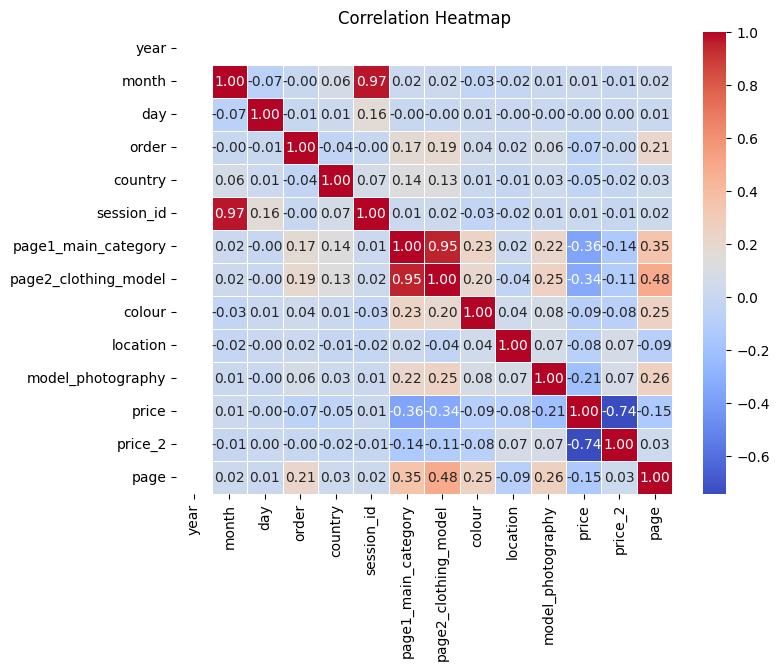

In [99]:
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [145]:
# Create the model
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
dt_regressor.fit(scaled_x_train, y_train)
y_pred = dt_regressor.predict(scaled_x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print("Mean Absolute Error = ",mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error = ",root_mean_squared_error(y_test,y_pred))

Mean Squared Error (MSE): 10.98
R² Score: 0.93
Mean Absolute Error =  1.9954535217714695
Root Mean Squared Error =  3.314329047335683


In [101]:
train_predictions = dt_regressor.predict(scaled_x_train)
training_score = r2_score(y_train, train_predictions)

print(f"Training R² Score: {training_score:.2f}")

Training R² Score: 0.93


Clustering

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   year                  132379 non-null  int64
 1   month                 132379 non-null  int64
 2   day                   132379 non-null  int64
 3   order                 132379 non-null  int64
 4   country               132379 non-null  int64
 5   session_id            132379 non-null  int64
 6   page1_main_category   132379 non-null  int64
 7   page2_clothing_model  132379 non-null  int64
 8   colour                132379 non-null  int64
 9   location              132379 non-null  int64
 10  model_photography     132379 non-null  int64
 11  price                 132379 non-null  int64
 12  price_2               132379 non-null  int64
 13  page                  132379 non-null  int64
dtypes: int64(14)
memory usage: 14.1 MB


In [120]:
df_clus=df.drop(['price_2','page1_main_category','page2_clothing_model','page'],axis=1)

In [121]:
df_clus

,year,month,day,order,country,session_id,colour,location,model_photography,price
0,2008,6,22,21,29,15648,13,1,2,48
1,2008,5,19,6,29,10018,13,3,1,57
2,2008,7,15,2,29,19388,9,5,1,48
3,2008,5,2,2,29,7181,2,4,1,43
4,2008,6,9,16,29,13493,9,5,1,57
...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,29,17622,2,1,1,48
132375,2008,6,19,9,29,15165,14,3,1,28
132376,2008,7,15,4,29,19359,3,2,2,38
132377,2008,7,28,16,29,21454,9,5,2,20


In [137]:
standard_scaler = StandardScaler()
scaled_value= standard_scaler.fit_transform(df)
scaled_df_clus=pd.DataFrame(scaled_value,columns=df.columns)
scaled_df_clus

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,0.0,0.314174,0.848597,2.062194,0.286643,0.514697,0.523645,0.091727,1.597940,-1.319159,1.686940,0.335888,-0.977227,0.292634
1,0.0,-0.438805,0.508811,-0.210827,0.286643,-0.288163,-0.349717,-0.383512,1.597940,-0.152333,-0.592789,1.053629,-0.977227,0.292634
2,0.0,1.067153,0.055762,-0.816966,0.286643,1.048035,0.523645,-0.044055,0.654173,1.014493,-0.592789,0.335888,-0.977227,-0.723941
3,0.0,-0.438805,-1.416646,-0.816966,0.286643,-0.692730,-0.349717,-0.638105,-0.997418,0.431080,-0.592789,-0.062857,1.023304,-0.723941
4,0.0,0.314174,-0.623811,1.304521,0.286643,0.207386,-0.349717,-0.281675,0.654173,1.014493,-0.592789,1.053629,-0.977227,0.292634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,0.0,1.067153,-1.190122,-0.665431,0.286643,0.796197,1.397008,1.059179,-0.997418,-1.319159,-0.592789,0.335888,-0.977227,0.292634
132375,0.0,0.314174,0.508811,0.243777,0.286643,0.445819,0.523645,0.193565,1.833881,-0.152333,-0.592789,-1.259092,1.023304,0.292634
132376,0.0,1.067153,0.055762,-0.513896,0.286643,1.043900,-1.223079,-0.841779,-0.761476,-0.735746,1.686940,-0.461602,1.023304,-0.723941
132377,0.0,1.067153,1.528171,1.304521,0.286643,1.342655,0.523645,0.651831,0.654173,1.014493,1.686940,-1.897084,1.023304,1.309209


In [138]:
# Actual K - Means Clustering Algorithm
kmeans_algorithm = KMeans(n_clusters = 2)
kmeans_algorithm.fit(scaled_df_clus)

KMeans(n_clusters=2)

In [140]:
labels=kmeans_algorithm.labels_

In [125]:
df_clus['cluster_prediction'] = kmeans_algorithm.labels_

In [126]:
df_clus

,year,month,day,order,country,session_id,colour,location,model_photography,price,cluster_prediction
0,2008,6,22,21,29,15648,13,1,2,48,1
1,2008,5,19,6,29,10018,13,3,1,57,0
2,2008,7,15,2,29,19388,9,5,1,48,1
3,2008,5,2,2,29,7181,2,4,1,43,0
4,2008,6,9,16,29,13493,9,5,1,57,1
...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,29,17622,2,1,1,48,1
132375,2008,6,19,9,29,15165,14,3,1,28,1
132376,2008,7,15,4,29,19359,3,2,2,38,1
132377,2008,7,28,16,29,21454,9,5,2,20,1


In [127]:
df['price_2']

0         1
1         1
2         1
3         2
4         1
         ..
132374    1
132375    2
132376    2
132377    2
132378    1
Name: price_2, Length: 132379, dtype: int64

In [141]:
#Evaluation of K-Means (-1 to 1)
# if silhouette_score is near to 1 (good match of the cluster)
# if silhouette_score is near to 0 (confusion between two cluster)
# if silhouette_score is near to -1 (bad match of the cluster)
from sklearn.metrics import silhouette_score
scoring = silhouette_score(scaled_df_clus,labels)
scoring


np.float64(0.14927520706964595)

In [142]:
# Inertia (WCSS)
#inertia = kmeans_algorithm.inertia_
#print(f"Inertia (WCSS): {inertia:.2f}")

# Silhouette Score
silhouette = silhouette_score(scaled_df_clus,labels)
print(f"Silhouette Score: {silhouette:.2f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_df_clus,labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")


Silhouette Score: 0.15
Davies-Bouldin Index: 2.30


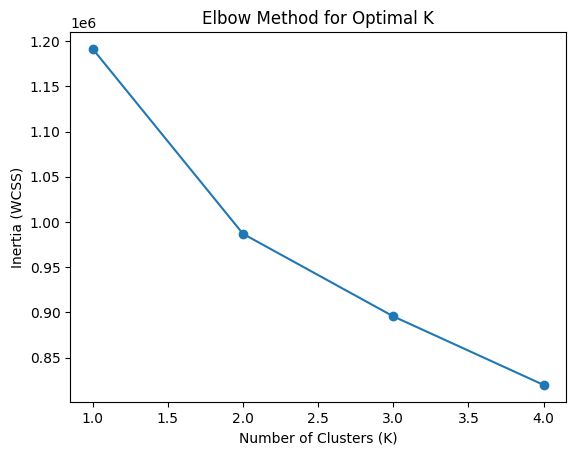

In [133]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K_range = range(1, 5)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df_clus)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [118]:
df_clus['cluster_prediction'].unique()

array([0, 1], dtype=int32)

In [149]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
y_dbscan = dbscan.fit_predict(scaled_df_clus)

# Evaluate clustering performance
silhouette = silhouette_score(scaled_df_clus, y_dbscan)
davies_bouldin = davies_bouldin_score(scaled_df_clus, y_dbscan)

print(f'Silhouette Score: {silhouette}')
print(f'Davies-Bouldin Index: {davies_bouldin}')


Silhouette Score: -0.08768614846663267
Davies-Bouldin Index: 1.2498599021306842


In [144]:
mlflow.set_experiment("2nd_experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
with mlflow.start_run(run_name="linear_regression"):
    #mlflow.log_params (best_params_lr)
    mlflow.log_metrics({
    "R2 SCORE": 0.7885417421770684,
    "MSE": 33.47991013064993,
    "RMSE": 5.786182690742656,
    "MAE":  4.379620794963373
})
    mlflow.sklearn.log_model(lr,artifact_path="LinearRegression")

2025/02/18 19:48:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run linear_regression at: http://127.0.0.1:5000/#/experiments/385524123148715307/runs/acf0ba19de7847ae86b9c68dce091579
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/385524123148715307


In [146]:
mlflow.set_experiment("2nd_experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
with mlflow.start_run(run_name="decision_tree_regressor"):
    mlflow.log_params ({'max_depth':5})
    mlflow.log_metrics({
    "R2 SCORE": 0.93,
    "MSE": 10.98,
    "RMSE": 3.314329047335683,
    "MAE": 1.9954535217714695
})
    mlflow.sklearn.log_model(dt_regressor,artifact_path="DecisionTreeRegressor")

2025/02/18 20:21:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run decision_tree_regressor at: http://127.0.0.1:5000/#/experiments/385524123148715307/runs/2220ed1c56d54a1f9369efadf2da6026
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/385524123148715307


In [147]:
mlflow.set_experiment("2nd_experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
with mlflow.start_run(run_name="K_Means"):
    mlflow.log_params ({'n_clusters':2})
    mlflow.log_metrics({'Silhouette Score': 0.15,
                        'Davies-Bouldin Index': 2.30})
    mlflow.sklearn.log_model(kmeans_algorithm,artifact_path="KMeans")

2025/02/18 20:25:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run K_Means at: http://127.0.0.1:5000/#/experiments/385524123148715307/runs/a639c35a19544b76b5a948f47c32cfcf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/385524123148715307


In [150]:
mlflow.set_experiment("2nd_experiment")
mlflow.set_tracking_uri("http://127.0.0.1:5000")
with mlflow.start_run(run_name="DBSCAN"):
    mlflow.log_params ({'eps':0.5, 'min_samples':2})
    mlflow.log_metrics({'Silhouette Score': -0.08768614846663267,
                        'Davies-Bouldin Index':1.2498599021306842})
    mlflow.sklearn.log_model(dbscan,artifact_path="DBSCAN")

2025/02/18 20:32:35 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/02/18 20:32:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run DBSCAN at: http://127.0.0.1:5000/#/experiments/385524123148715307/runs/02c61fef816e41a99a0154affcba5624
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/385524123148715307


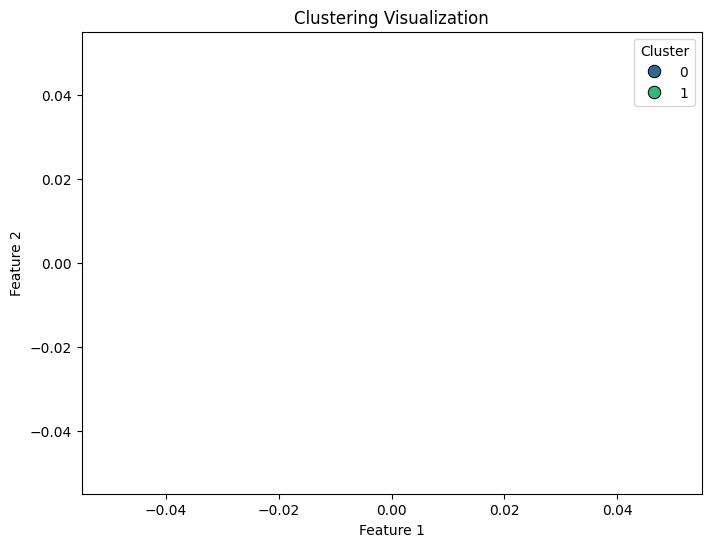

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clus['session_id'],  hue=labels, palette="viridis", s=80, edgecolor='k')
plt.title("Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

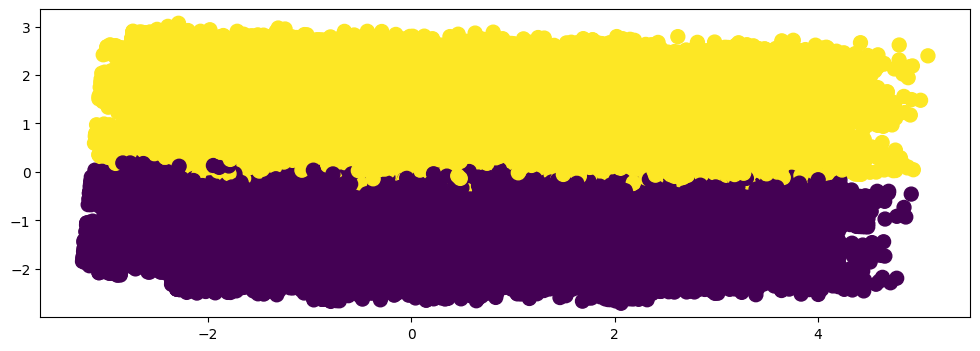

In [158]:
from sklearn.decomposition import PCA
pca_object = PCA(n_components=2)
df_pca = pca_object.fit_transform(scaled_df_clus)
plt.figure(figsize = (12, 4))
centroids = df_clus['cluster_prediction']
plt.scatter(df_pca[:, 0], df_pca[:,1], c = centroids, s = 100, marker = 'o')
plt.show()

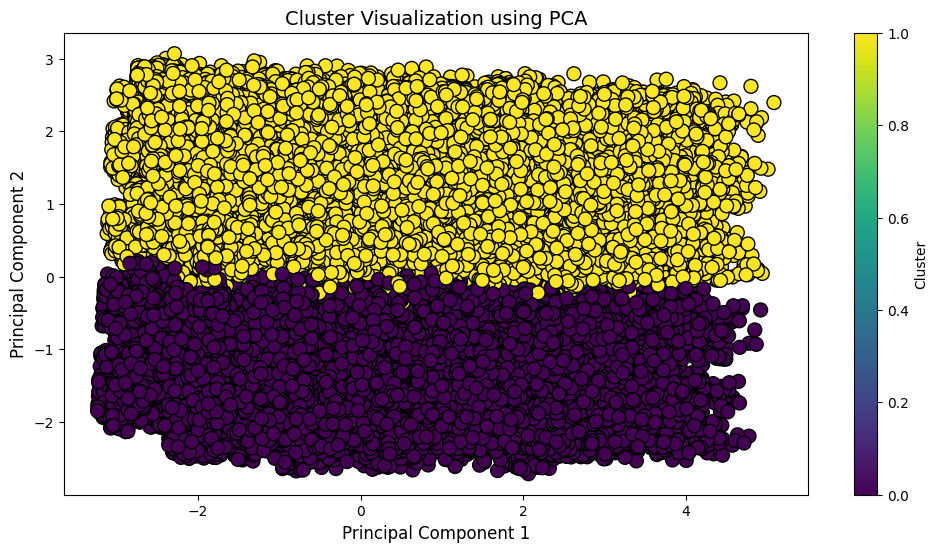

In [159]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca_object = PCA(n_components=2)
df_pca = pca_object.fit_transform(scaled_df_clus)

# Extract cluster labels (assuming df_clus contains cluster predictions)
centroids = df_clus['cluster_prediction']

# Create the plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=centroids, cmap='viridis', s=100, marker='o', edgecolors='k')

# Add title and labels
plt.title("Cluster Visualization using PCA", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)

# Add color legend
plt.colorbar(scatter, label="Cluster")

# Show the plot
plt.show()
